In [14]:
#-- coding : utf-8 --

In [13]:
import nltk,csv
import os
import re
import matplotlib.pyplot
import pandas as pd

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/coco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
nltk_stopwords = nltk.corpus.stopwords.words('french')

In [7]:
nltk_stopwords.append('les')
nltk_stopwords.append('tout')
nltk_stopwords.append('toutes')
nltk_stopwords.append('tous')

In [8]:
with open("df_cotedargent.csv") as file:
    data = csv.reader(file)
    mylist = list(data)

In [9]:
finalist=[]
for i in mylist:
    for j in i:
        tempo = j.split(" ")
        for k in tempo:
            if k.lower() not in nltk_stopwords:
                finalist.append(k)

In [10]:
finalist2 = []
for i in finalist:
    if i != '':
        if re.match(r"^\d+$",i) is None:
            if re.match(r"^\d+,\d{2}$|^\d+€",i) is None:
                i = i.lower()
                i = re.sub(r'\(','',i)
                finalist2.append(i)

In [12]:
finalist2

['coupe',
 'sorbet',
 'chariot',
 'desserts',
 'l’assiette',
 'gourmande',
 'l’assiette',
 'fruits',
 'mer',
 'crabe,',
 'huître,',
 'langoustine,',
 'bulots,',
 'crevettes',
 'grises',
 'royales)',
 'petite',
 'assiette',
 'fruits',
 'mer',
 'pince',
 'crabe,',
 'bulots,',
 'crevettes',
 'royales)',
 'aïoli',
 'bulots',
 'salade',
 'd’endives',
 'soupe',
 'poissons,',
 'maison',
 'salade',
 'césar,',
 'oeuf',
 'parfait',
 'volaille',
 'fumée',
 'wok',
 'crevettes',
 'royales',
 'petits',
 'légumes',
 'l’aigre',
 'doux',
 'huîtres',
 'fines',
 'claires',
 'n°3',
 'blainville',
 'huîtres',
 'fines',
 'claires',
 'n°3',
 'blainville',
 'huîtres',
 'gratinées',
 'safran',
 'piment',
 'd’espelette',
 'foie',
 'gras',
 'canard,',
 'chutney',
 'poivre',
 'timur,',
 'brioche',
 'maison',
 'saumon',
 'fumé',
 'ficelle,',
 'perle',
 'citron',
 'salade',
 'd’endive',
 'demi',
 'homard',
 'd’audreselles,',
 'mousseline',
 'céleri',
 'fèves',
 'l’assiette',
 'fruits',
 'mer',
 'crabe,',
 'huître,'

In [15]:
df_cotedargent = pd.DataFrame(finalist2)

In [16]:
pd.DataFrame.to_csv(df_cotedargent,"cotedargent.csv")

In [140]:
dico = {}
for i in finalist2:
    if i not in dico:
        dico[i] = 1
    else:
        dico[i] += 1

In [141]:
dico

{'américaine': 1,
 'angus,': 3,
 'asperge': 1,
 'assiette': 7,
 'aïoli': 7,
 'bavette': 1,
 'bearnaise': 1,
 'belle': 1,
 'beurre': 2,
 'blainville': 14,
 'bouillabaisse': 1,
 'brioche': 7,
 'bulots': 7,
 'bulots,': 15,
 'butternut': 1,
 'bœuf': 1,
 'cabillaud': 1,
 'calais': 1,
 'calaisienne': 1,
 'canard': 1,
 'canard,': 7,
 'carotte': 1,
 'chariot': 1,
 'chaud,': 1,
 'chutney': 7,
 'citron': 7,
 'claires': 14,
 'confites': 1,
 'coupe': 1,
 'crabe,': 15,
 'crevettes': 22,
 'cumin': 1,
 'céleri': 7,
 'césar,': 7,
 'demi': 7,
 'desserts': 1,
 'dos': 1,
 'douces': 1,
 'doux': 7,
 'décortiqué,': 1,
 'd’audreselles,': 7,
 'd’endive': 7,
 'd’endives': 7,
 'd’entrecôte': 1,
 'd’espelette': 7,
 'entier': 1,
 'fenouil': 1,
 'ficelle,': 7,
 'figues': 1,
 'filet': 2,
 'filets': 1,
 'fines': 14,
 'flamande': 1,
 'foie': 7,
 'fruits': 14,
 'fumé': 8,
 'fumée': 7,
 'fèves': 7,
 'gourmande': 1,
 'graine': 1,
 'grammes': 1,
 'gras': 7,
 'gratinées': 7,
 'grises': 8,
 'homard': 8,
 'huître,': 7,
 'hu

In [142]:
import pandas as pd
import matplotlib.pyplot

In [143]:
df = pd.Series(dico)

In [149]:
df = df.sort_values(ascending=False)

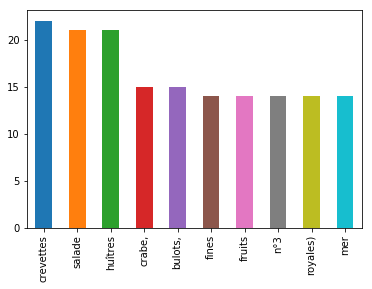

In [154]:
graph = df[0:10].plot(kind="bar")
plot = graph.get_figure()
plot.savefig('keywords_aucotedargent')